In [ ]:
#import the libraries and data
#EDA-Exploratory Data Analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
%matplotlib inline

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Fin_Data.csv")

In [ ]:
dataset.head(10)

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
5,8492423,21,weekly,0,2303,0,5,8,2,7,1,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
6,7948313,26,bi-weekly,0,2795,0,4,4,1,6,1,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
7,4297036,43,bi-weekly,0,5000,0,2,1,1,2,1,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1
8,6493191,32,semi-monthly,0,5260,3,0,3,1,4,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3,1
9,8908605,51,bi-weekly,1,3055,0,6,11,4,2,1,600,59750,0.624666,0.968565,0.509919,0.749624,0.758607,0.758607,5,1


In [ ]:
dataset.tail()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
17903,9949728,31,monthly,0,3245,0,5,3,2,6,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1
17907,1498559,29,weekly,1,2665,0,4,10,4,1,1,600,64950,0.720889,0.874372,0.505565,0.631619,0.846163,0.846163,4,1


In [ ]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [ ]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [ ]:
#cleaning data
dataset.isna().any()
dataset.isna().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [ ]:
dataset2 = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


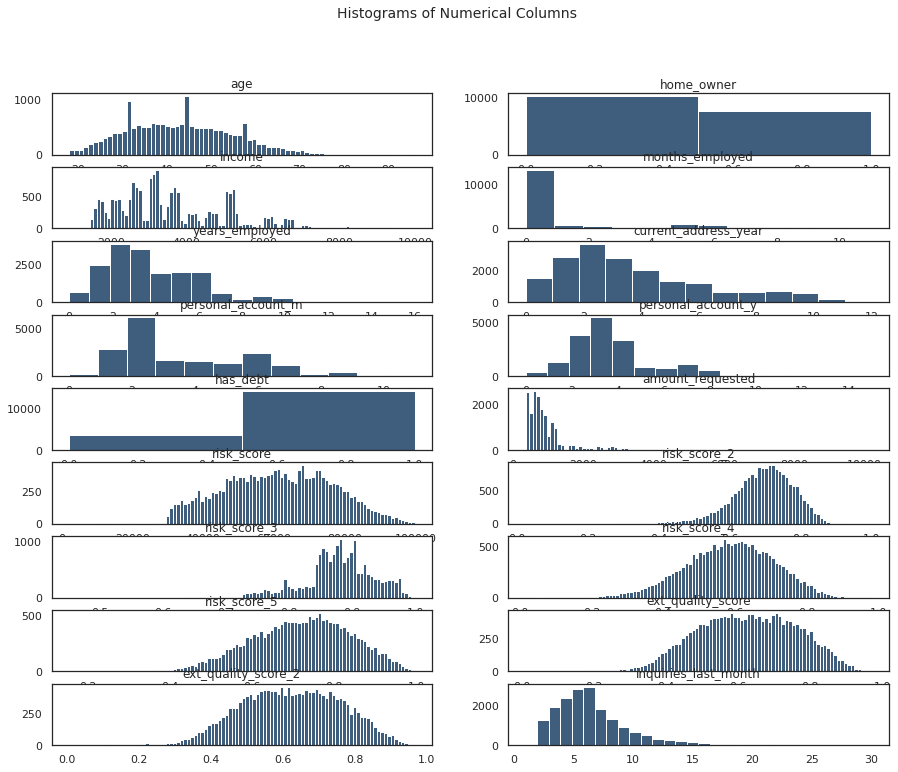

In [ ]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=14)
for i in range(dataset2.shape[1]):
   plt.subplot(9, 2, i+1)
   f = plt.gca()#gca stands for get current axes
   f.set_title(dataset2.columns.values[i])
   vals = np.size(dataset2.iloc[:, i].unique())
   if vals >= 100:
        vals = 100

   plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[100, 0.05, 2, 0.95])
#the layout is for rectangular show play with it to better fit ur screen
#also if you want make a few histograms at a time

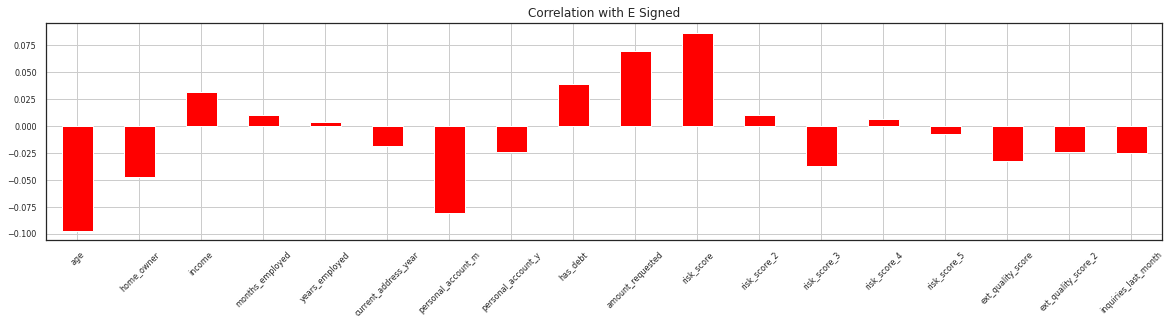

In [ ]:
#correlation Graph
from IPython.core.pylabtools import figsize
dataset2.corrwith(dataset.e_signed).plot.bar(
        figsize = (20, 4), title = "Correlation with E Signed", fontsize = 8,
        rot = 45, grid = True, color='red')

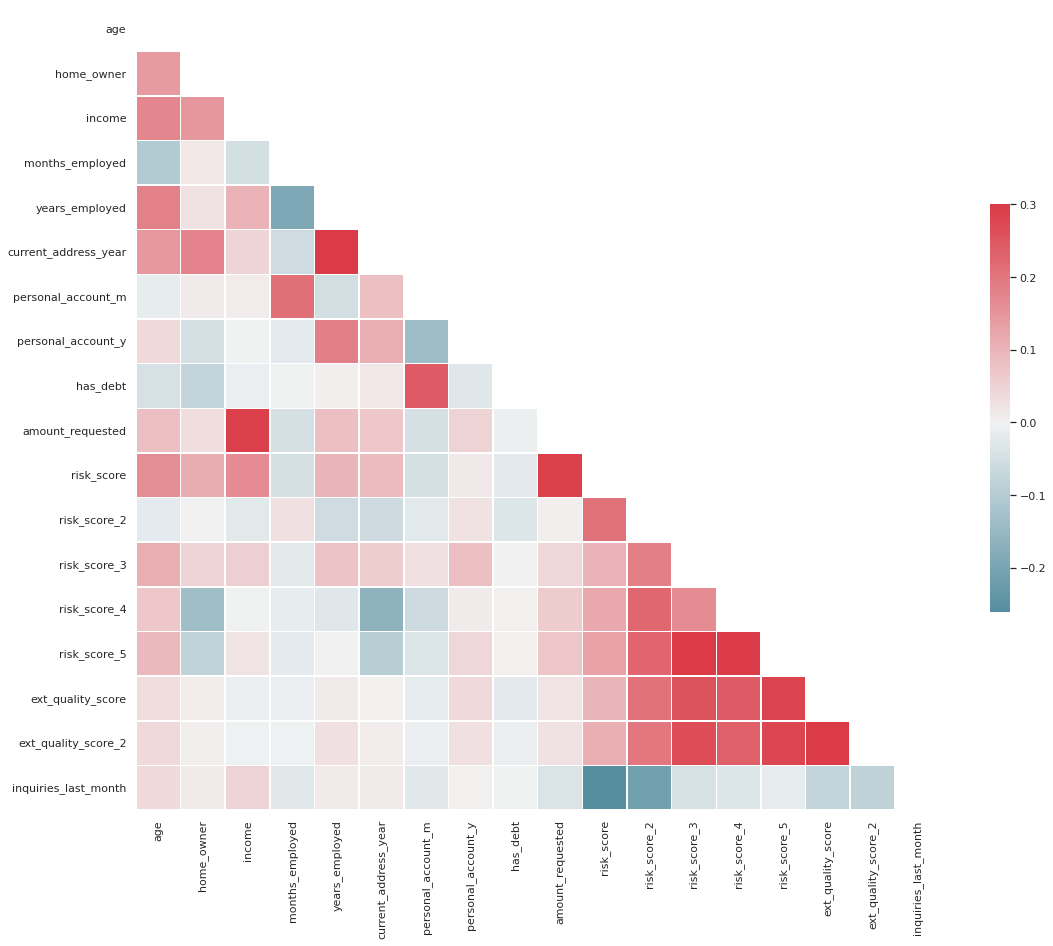

In [ ]:
#correlation matrix

sn.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
#Return an array of zeros with the same shape and type as a given array.
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#cmap is short for colormap
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
